In [16]:
## import libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [17]:
## read the dataset
df= pd.read_csv("IR_A2_data.txt", sep=" ", header=None)
print(df.shape)
df.head()

(239093, 139)


,0,1,2,3,4,5,6,7,8,9,...,129,130,131,132,133,134,135,136,137,138
0,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,128:2,129:9,130:124,131:4678,132:54,133:74,134:0,135:0,136:0,NaN
1,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:0,129:8,130:122,131:508,132:131,133:136,134:0,135:0,136:0,NaN
2,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,128:2,129:8,130:115,131:508,132:51,133:70,134:0,135:0,136:0,NaN
3,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:82,129:17,130:122,131:508,132:83,133:107,134:0,135:10,136:13.35,NaN
4,1,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:11,129:8,130:121,131:508,132:103,133:120,134:0,135:0,136:0,NaN


In [19]:
# filtering of columns and drop unwanted columns
df1 = df.iloc[:, :-1]
df1 = df1.rename(columns={0:'relevence_score', 1:'qid'})
df1 = df1[df1['qid'] == 'qid:4']
df1 = df1.drop(['qid'], axis=1)
df1 = df1.set_axis(['relevence_score'] + list(range(1, 137)), axis='columns')
print(df1.shape)
df1.head()

(103, 137)


,relevence_score,1,2,3,4,5,6,7,8,9,...,127,128,129,130,131,132,133,134,135,136
0,0,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,9:0,...,127:27,128:2,129:9,130:124,131:4678,132:54,133:74,134:0,135:0,136:0
1,0,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,9:0,...,127:61,128:0,129:8,130:122,131:508,132:131,133:136,134:0,135:0,136:0
2,0,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,9:0,...,127:31,128:2,129:8,130:115,131:508,132:51,133:70,134:0,135:0,136:0
3,0,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,9:0,...,127:32,128:82,129:17,130:122,131:508,132:83,133:107,134:0,135:10,136:13.35
4,1,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,9:0,...,127:29,128:11,129:8,130:121,131:508,132:103,133:120,134:0,135:0,136:0


In [20]:
# user define function for preprocessing
def preprocessing(row):
    for i, item in enumerate(row):
        temp = item.split(":")
        row[i+1] = float(temp[1])
    return row

In [21]:
# apply preprocesing function on dataframe
df1.iloc[:, 1:] = df1.iloc[:, 1:].apply(preprocessing, axis=1)
df1.head()

,relevence_score,1,2,3,4,5,6,7,8,9,...,127,128,129,130,131,132,133,134,135,136
0,0,3.0,0.0,2.0,0.0,3.0,1.0,0.0,0.666667,0.0,...,27.0,2.0,9.0,124.0,4678.0,54.0,74.0,0.0,0.0,0.00
1,0,3.0,0.0,3.0,0.0,3.0,1.0,0.0,1.000000,0.0,...,61.0,0.0,8.0,122.0,508.0,131.0,136.0,0.0,0.0,0.00
2,0,3.0,0.0,2.0,0.0,3.0,1.0,0.0,0.666667,0.0,...,31.0,2.0,8.0,115.0,508.0,51.0,70.0,0.0,0.0,0.00
3,0,3.0,0.0,3.0,0.0,3.0,1.0,0.0,1.000000,0.0,...,32.0,82.0,17.0,122.0,508.0,83.0,107.0,0.0,10.0,13.35
4,1,3.0,0.0,3.0,0.0,3.0,1.0,0.0,1.000000,0.0,...,29.0,11.0,8.0,121.0,508.0,103.0,120.0,0.0,0.0,0.00


In [22]:
# check distribution of relevence score
count_relevence = df1.relevence_score.value_counts()
print(count_relevence)
count_relevence = count_relevence.tolist()

0    59
1    26
2    17
3     1
Name: relevence_score, dtype: int64


## Part A

In [23]:
# rearranges the query-url pairs in order of the maximum DCG and save file
df2 = df1.sort_values(by='relevence_score', ascending=False)
df2.to_csv('max_dcg_data.txt', index=None, sep=' ', mode='a')
df2.head(10)

,relevence_score,1,2,3,4,5,6,7,8,9,...,127,128,129,130,131,132,133,134,135,136
7,3,3.0,0.0,2.0,1.0,3.0,1.000000,0.000000,0.666667,0.333333,...,32.0,349.0,8.0,123.0,281.0,22.0,6.0,0.0,0.0,0.000000
76,2,2.0,0.0,1.0,0.0,2.0,0.666667,0.000000,0.333333,0.000000,...,19.0,0.0,0.0,2417.0,721.0,14.0,113.0,0.0,13.0,47.900000
40,2,3.0,2.0,2.0,0.0,3.0,1.000000,0.666667,0.666667,0.000000,...,33.0,8.0,3.0,1888.0,9338.0,3.0,11.0,0.0,0.0,0.000000
36,2,3.0,0.0,2.0,0.0,3.0,1.000000,0.000000,0.666667,0.000000,...,17.0,0.0,2.0,12028.0,11379.0,26.0,24.0,0.0,77.0,23.959522
90,2,3.0,0.0,3.0,3.0,3.0,1.000000,0.000000,1.000000,1.000000,...,67.0,27.0,0.0,814.0,13555.0,108.0,113.0,0.0,0.0,0.000000
25,2,3.0,0.0,3.0,1.0,3.0,1.000000,0.000000,1.000000,0.333333,...,52.0,2664.0,0.0,5753.0,11746.0,8.0,68.0,0.0,0.0,0.000000
37,2,2.0,0.0,2.0,0.0,2.0,0.666667,0.000000,0.666667,0.000000,...,23.0,0.0,0.0,16417.0,9338.0,29.0,29.0,6.0,68.0,28.190204
22,2,3.0,1.0,3.0,0.0,3.0,1.000000,0.333333,1.000000,0.000000,...,59.0,189.0,8.0,144.0,4307.0,82.0,108.0,0.0,0.0,0.000000
21,2,3.0,1.0,3.0,2.0,3.0,1.000000,0.333333,1.000000,0.666667,...,67.0,8.0,5.0,144.0,395.0,13.0,56.0,0.0,0.0,0.000000
19,2,3.0,0.0,2.0,1.0,3.0,1.000000,0.000000,0.666667,0.333333,...,49.0,553.0,2.0,876.0,10008.0,42.0,45.0,0.0,0.0,0.000000


In [24]:
# total number of files
relevence_comb = []
for relevence in count_relevence:
    num = 1
    for x in range(relevence):
        num *= relevence
    relevence_comb.append(num)


total_files = 1
for num in relevence_comb:
    total_files *= num

    
print("Total files which have maximum DCS is")
print(total_files)

Total files which have maximum DCS is
1538889362280615478396467263346896248106161656275446635101351610925178486605170326155612828485828968844216913791477960601289924496793568264113015889676630677782528


## Part B

In [10]:
# function to compute nDCG at rank k
import math

def compute_dcg(relevence_score):
    dcg = relevence_score[0]
    i = 2
    for score in relevence_score[1:]:
        dcg += score / math.log2(i)
        i += 1
    return dcg
        
def compute_ndcg(relevence_score, k):
    dcg = compute_dcg(relevence_score[:k])
    max_dcg = compute_dcg(df2.relevence_score.tolist()[:k])
    nDCG = dcg / max_dcg
    return nDCG

In [11]:
# compute nDCG at position 50
compute_ndcg(df1.relevence_score, 50)

0.3521042740324887

In [12]:
# compute nDCG at enitere dataset
compute_ndcg(df1.relevence_score, len(df1))

0.5979226516897831

## Part 3

In [13]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

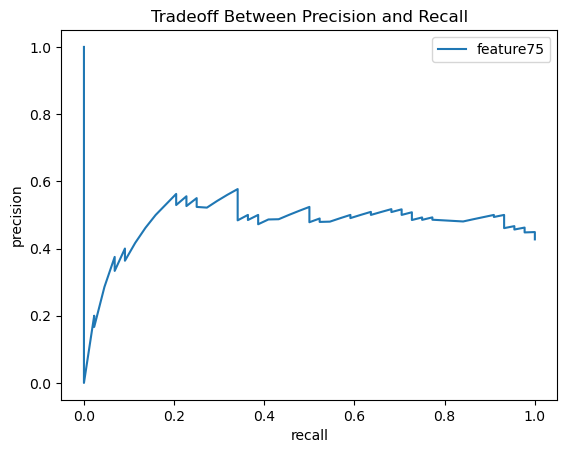

In [15]:
total_relevent = len([x for x in df1.relevence_score.tolist() if x != 0])
actual_relevence = [1 if x != 0 else 0 for x in df1.relevence_score.tolist()]

feature75 = df1.iloc[:, 75].tolist()
thresold_list = [x/sum(feature75) for x in feature75]
precision, recall, thresold =  precision_recall_curve(actual_relevence, thresold_list)

plt.plot(recall, precision, label="feature75")
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend()
plt.title("Tradeoff Between Precision and Recall")
plt.show()